In [1]:
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import pandas as pd

# 1. Bandstructure for perfect crystal

First, we initialize the crystal structure, using a triangular lattice with airholes of radius 0.3a. The background material is Indium Aluminum Arsenide, with refractive index 3.23 (is this correct?).

In [2]:
k_points = [mp.Vector3(),               # Gamma
              mp.Vector3(y=0.5),          # M
              mp.Vector3(-1 / 3, 1 / 3),  # K
              mp.Vector3()]               # Gamma

k_points = mp.interpolate(4, k_points)

geometry_lattice = mp.Lattice(size=mp.Vector3(3, 3),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))

# Initialize the holes. 
geometry = [mp.Cylinder(0.3, material=mp.air)]
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

default_material=mp.Medium(epsilon=10.4329)
resolution = 16
num_bands = 18

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

Next, we run simulations for TE waves within the 2D structure. 

In [3]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]




Finally, we graph the output. 

/tmp/ipykernel_18285/3966120904.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


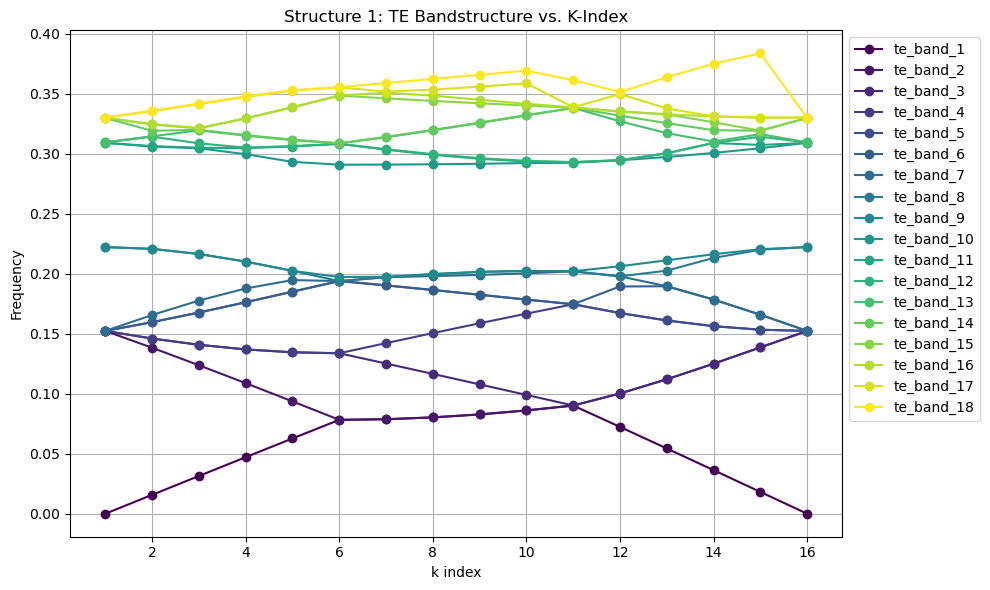

In [4]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 1: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Before we move on, let's store the band gap for reference.

In [5]:
gaps = ms.output_gaps(ms.band_range_data)
percent, gap_min, gap_max = gaps[0]

Gap from band 9 (0.22214621517856617) to band 10 (0.29077230761713946), 26.759061873812236%


# 2. Crystal structure with a waveguide defect. 

In order to introduce a line defect, we need a 3x3 grid. Here, we remove the middle row of holes by overwriting them with the background material. 

In [6]:
# Add a defect.
defect_geometry = mp.Cylinder(radius=0.3, material=default_material)
shift_vector = mp.Vector3(1, 0, 0)  
min_multiple = -1
max_multiple = 1  
defect_line = mp.geometric_object_duplicates(shift_vector, min_multiple, max_multiple, defect_geometry)
ms.geometry.extend(defect_line)

Once again, we run simulations to get the TE wave bandstructure. 

In [7]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]

_ = ms.output_gaps(ms.band_range_data)


Gap from band 9 (0.21598599123802426) to band 10 (0.2205580041031774), 2.094640134302928%
Gap from band 14 (0.27510983196797945) to band 15 (0.2958444335602925), 7.2631392194358995%


Finally, we graph the results. 

/tmp/ipykernel_18285/1374505635.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


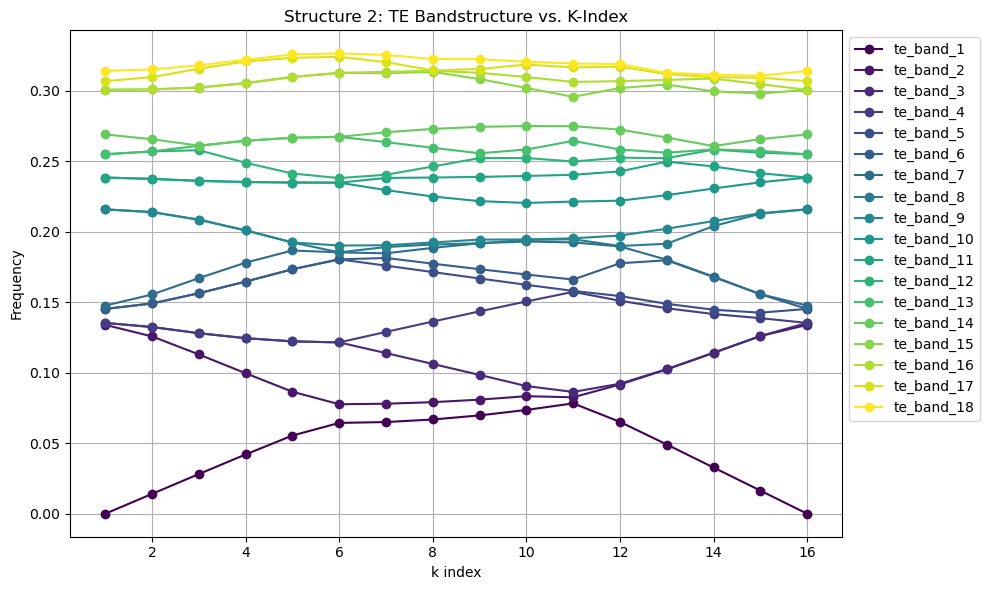

In [8]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we graph the waveguide's bandstructure again, but with the bandgap from part 1 highlighted in gray. 

/tmp/ipykernel_18285/2347428892.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


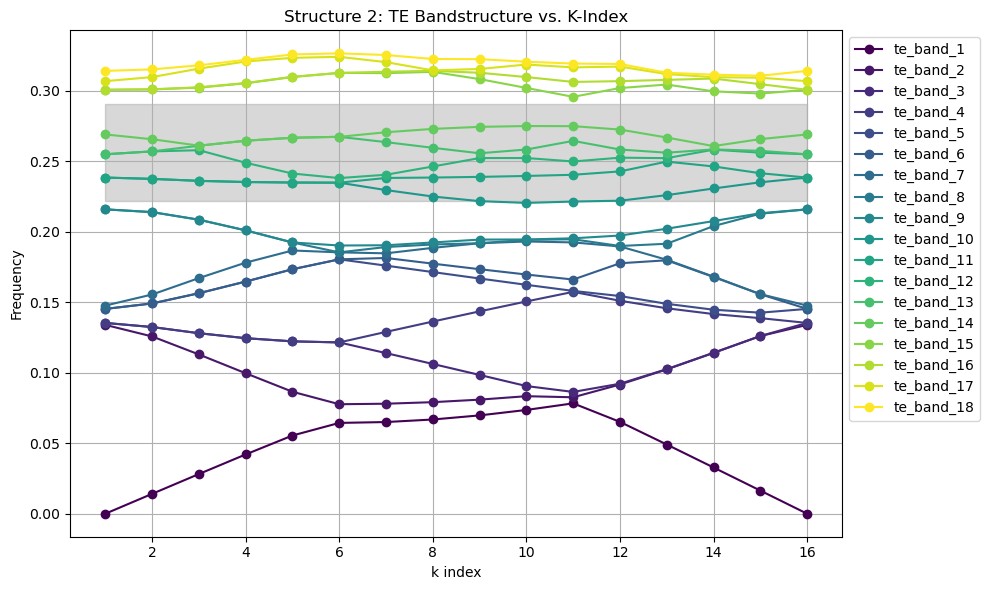

In [9]:
plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.fill_betweenx([gap_min, gap_max], df['k_index'].min(), df['k_index'].max(), color='grey', alpha=0.3, label='Band gap (perfect crystal)')

plt.show()

In [11]:
te_bands.head()

,te_band_1,te_band_2,te_band_3,te_band_4,te_band_5,te_band_6,te_band_7,te_band_8,te_band_9,te_band_10,te_band_11,te_band_12,te_band_13,te_band_14,te_band_15,te_band_16,te_band_17,te_band_18
0,0.000000,0.133990,0.135384,0.135390,0.145338,0.145339,0.147709,0.215983,0.215986,0.238546,0.238545,0.255078,0.255081,0.269142,0.300830,0.300835,0.306962,0.314242
1,0.014105,0.125787,0.132460,0.132476,0.149204,0.149228,0.155566,0.214018,0.214023,0.237598,0.237609,0.257105,0.257141,0.265751,0.301067,0.301200,0.309860,0.315313
2,0.028162,0.113001,0.128077,0.128094,0.156451,0.156481,0.167206,0.208631,0.208635,0.236203,0.236218,0.257963,0.261136,0.261190,0.302386,0.302587,0.315844,0.318195
3,0.042078,0.099664,0.124541,0.124555,0.164739,0.164769,0.178179,0.201054,0.201056,0.235377,0.235391,0.249022,0.264676,0.264726,0.305442,0.305646,0.320938,0.322126
4,0.055497,0.086532,0.122310,0.122319,0.173479,0.173506,0.186797,0.192475,0.192484,0.235013,0.235022,0.241406,0.266791,0.266820,0.309903,0.310050,0.323520,0.325902


In [12]:
output

['tefreqs:, k index, k1, k2, k3, kmag/2pi, te band 1, te band 2, te band 3, te band 4, te band 5, te band 6, te band 7, te band 8, te band 9, te band 10, te band 11, te band 12, te band 13, te band 14, te band 15, te band 16, te band 17, te band 18',
 'tefreqs:, 1, 0, 0, 0, 0, 0, 0.13399, 0.135384, 0.13539, 0.145338, 0.145339, 0.147709, 0.215983, 0.215986, 0.238546, 0.238545, 0.255078, 0.255081, 0.269142, 0.30083, 0.300835, 0.306962, 0.314242',
 'tefreqs:, 2, 0, 0.1, 0, 0.03849, 0.0141053, 0.125787, 0.13246, 0.132476, 0.149204, 0.149228, 0.155566, 0.214018, 0.214023, 0.237598, 0.237609, 0.257105, 0.257141, 0.265751, 0.301067, 0.3012, 0.30986, 0.315313',
 'tefreqs:, 3, 0, 0.2, 0, 0.07698, 0.028162, 0.113001, 0.128077, 0.128094, 0.156451, 0.156481, 0.167206, 0.208631, 0.208635, 0.236203, 0.236218, 0.257963, 0.261136, 0.26119, 0.302386, 0.302587, 0.315844, 0.318195',
 'tefreqs:, 4, 0, 0.3, 0, 0.11547, 0.0420776, 0.0996641, 0.124541, 0.124555, 0.164739, 0.164769, 0.178179, 0.201054, 0.2010